# Spectral Clustering

In [1]:
from matplotlib import pyplot as plt
from sklearn.cluster import SpectralClustering
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA

In [22]:
def spectral_clustering(n_clusters, data, is_3d=False):
    X = StandardScaler().fit_transform(data)

    params = {
        "quantile": 0.3,
        "eps": 0.3,
        "damping": 0.9,
        "preference": -200,
        "n_neighbors": 3,
        "n_clusters": n_clusters,
        "min_samples": 7,
        "xi": 0.05,
        "min_cluster_size": 0.1,
        "allow_single_cluster": True,
        "hdbscan_min_cluster_size": 15,
        "hdbscan_min_samples": 3,
        "random_state": 42,
    }

    spectral = SpectralClustering(
            n_clusters=params["n_clusters"],
            eigen_solver="arpack",
            affinity="nearest_neighbors",
            random_state=params["random_state"],
        )

    spectral.fit(X)

    if hasattr(spectral, "labels_"):
        y_pred = spectral.labels_.astype(int)
    else:
        y_pred = spectral.predict(X)

    colors = {
    0: "#FF1493", # pink
    1: "#CC0000", # red
    2: "#FF7F50", # orange
    3: "#FFD700", # yellow
    4: "#008000", # green
    5: "#00FF7F", # Spring Green
    6: "#2ACAEA", 
    7: "#2aeabd", # mint green
    8: "#0000FF", #  blue
    9: "#0e0e82", # dark blue
    10: "#7F00FF", # violet
    11: "#8A2BE2", # purple
    12: "#000000", # black
    13: "#5c5c5c" # grey
    }

    if is_3d:
        fig = plt.figure(figsize=(5,5),dpi=600)
        ax = fig.add_subplot(111, projection='3d')
        for pc1, pc2, pc3, c in zip(X[:, 0], X[:, 1], X[:, 2], y_pred):
            ax.scatter(pc1, pc2, pc3, s=10, color=colors[c])
        
        ax.view_init(elev=0, azim=180)
    else:
        fuck, ax = plt.subplots(1, figsize=(5,5),dpi=600)

        for pc1, pc2, c in zip(X[:, 0], X[:, 1], y_pred):
            ax.scatter(pc1, pc2, s=10, color=colors[c])
        
    return X, y_pred

## Making and plotting the concentric circles dataset

/Users/adrianaladera/opt/anaconda3/envs/deeznuts/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


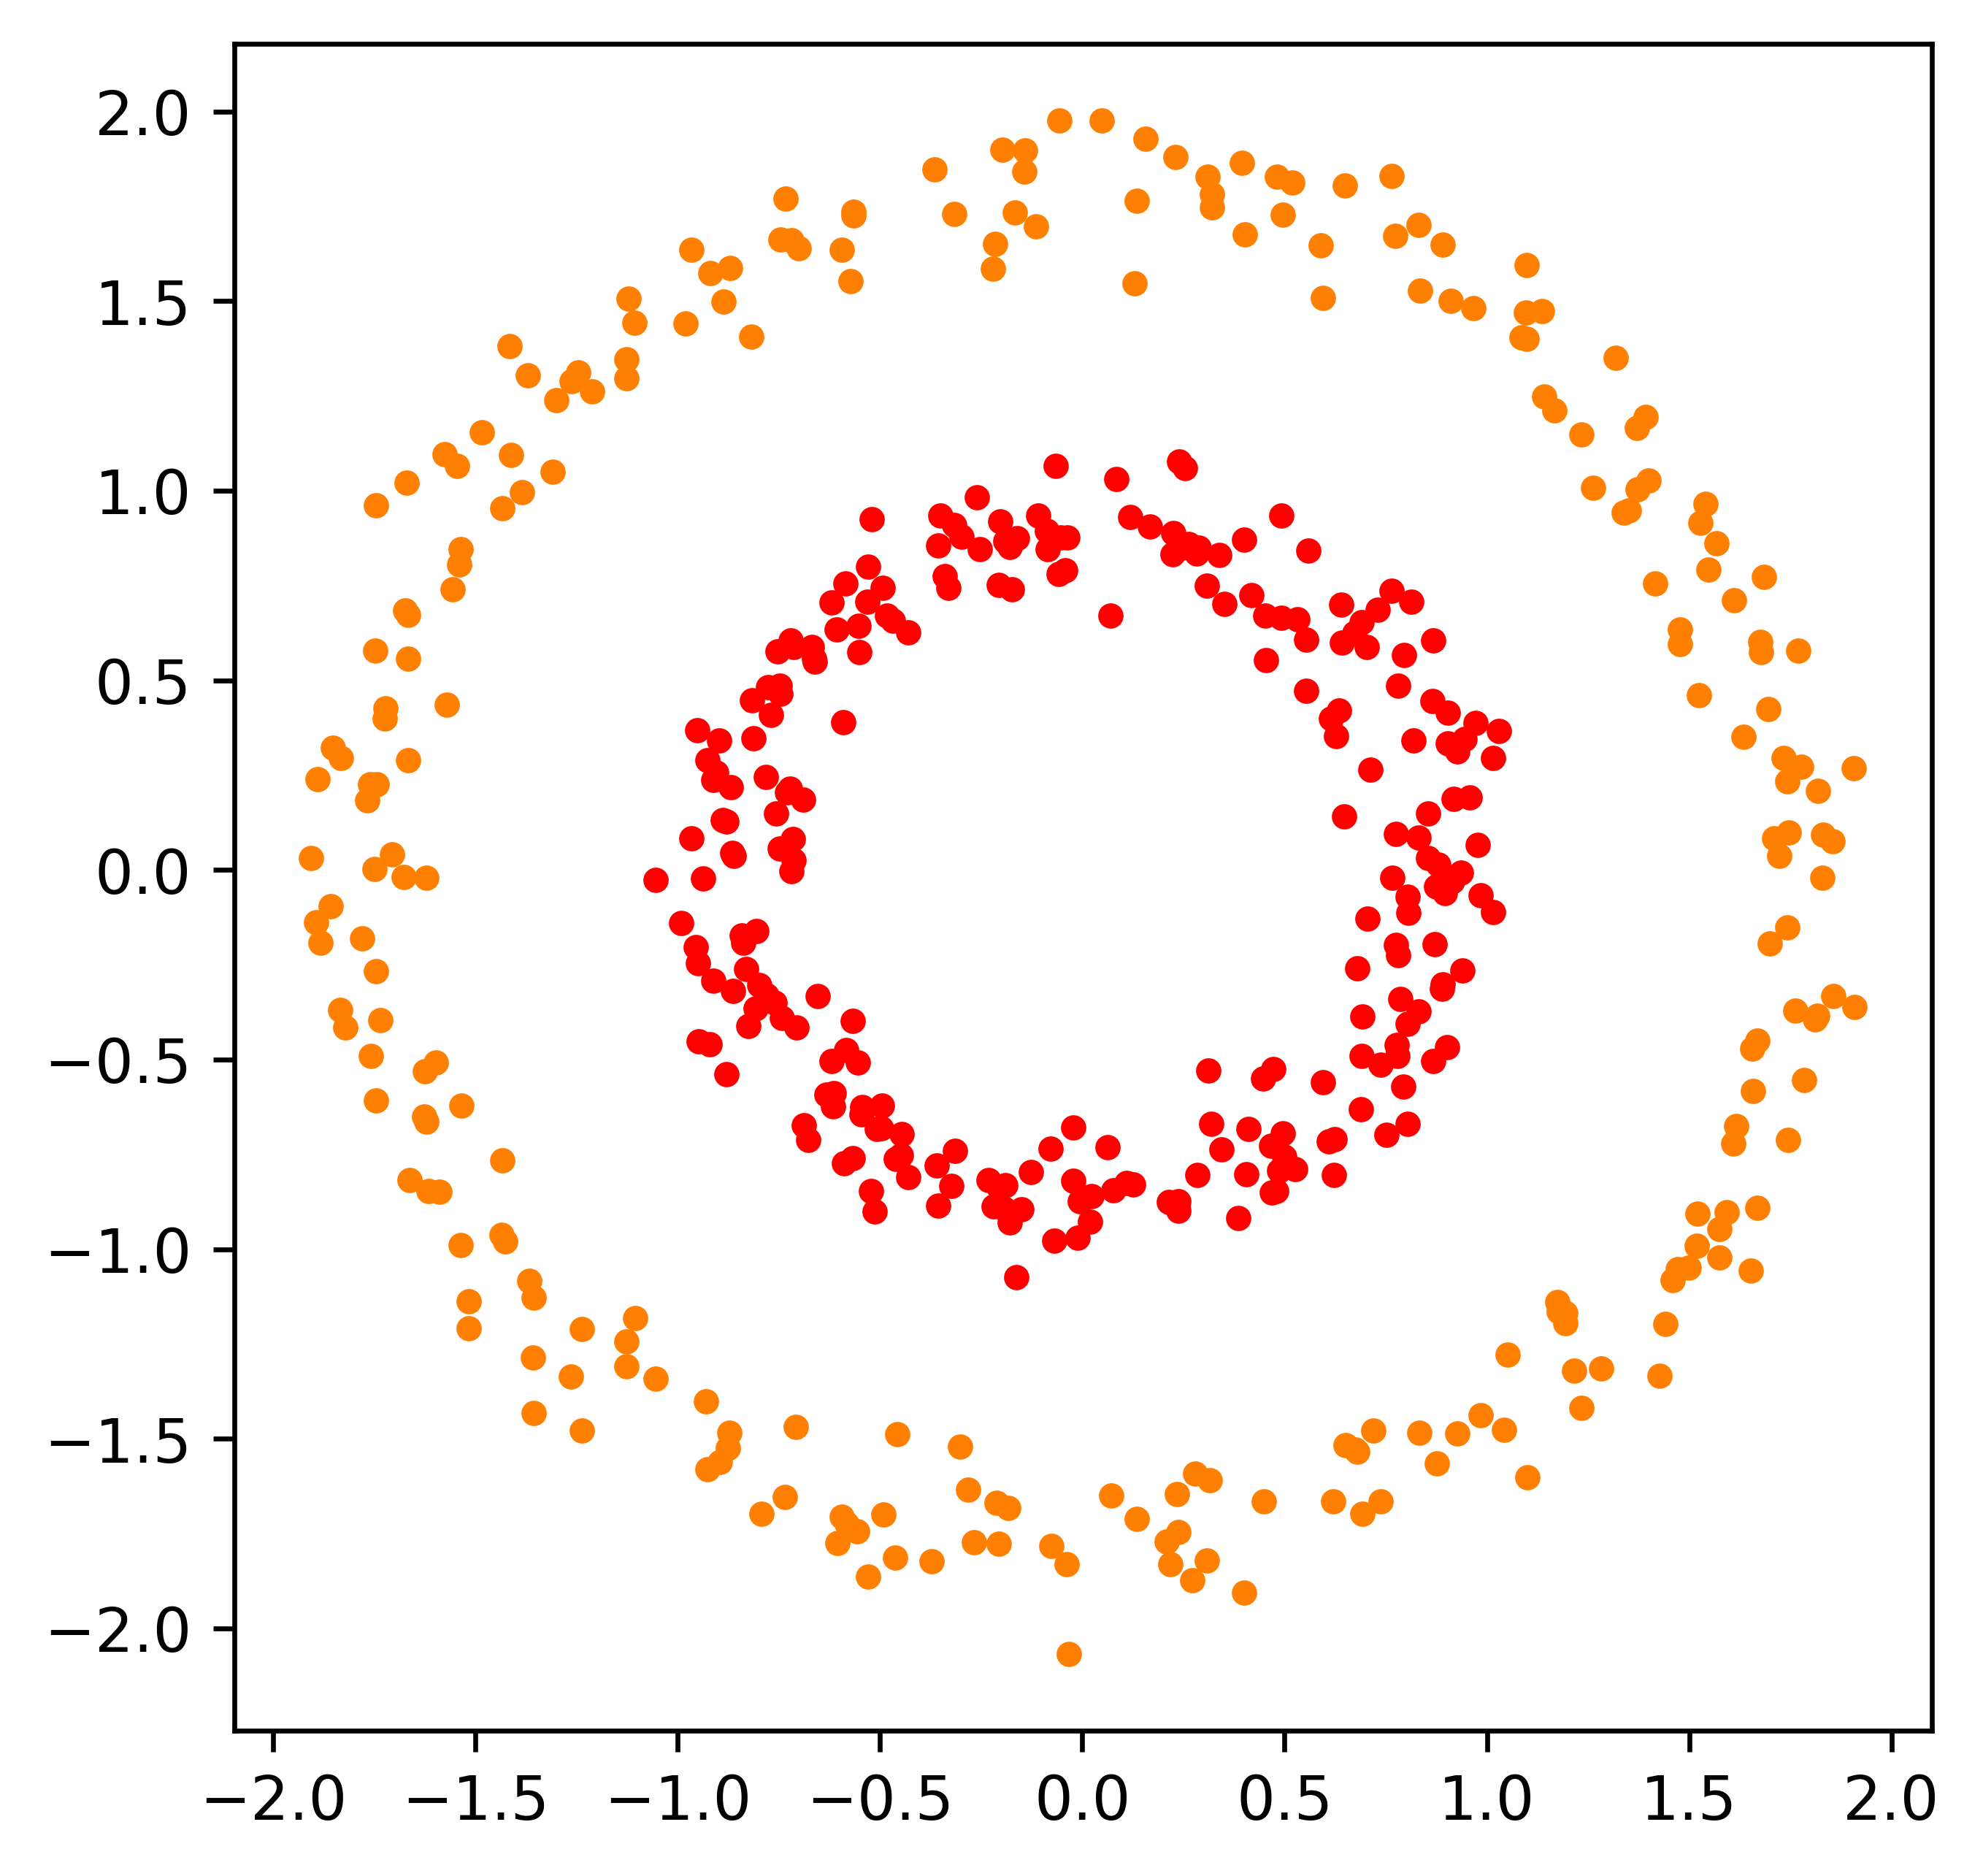

In [11]:
n_samples = 500
seed = 30
onion_rings = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed)
X,y = onion_rings

spectral_clustering(2, X);

## Doing the same but now with some crescent shapes!

/Users/adrianaladera/opt/anaconda3/envs/deeznuts/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


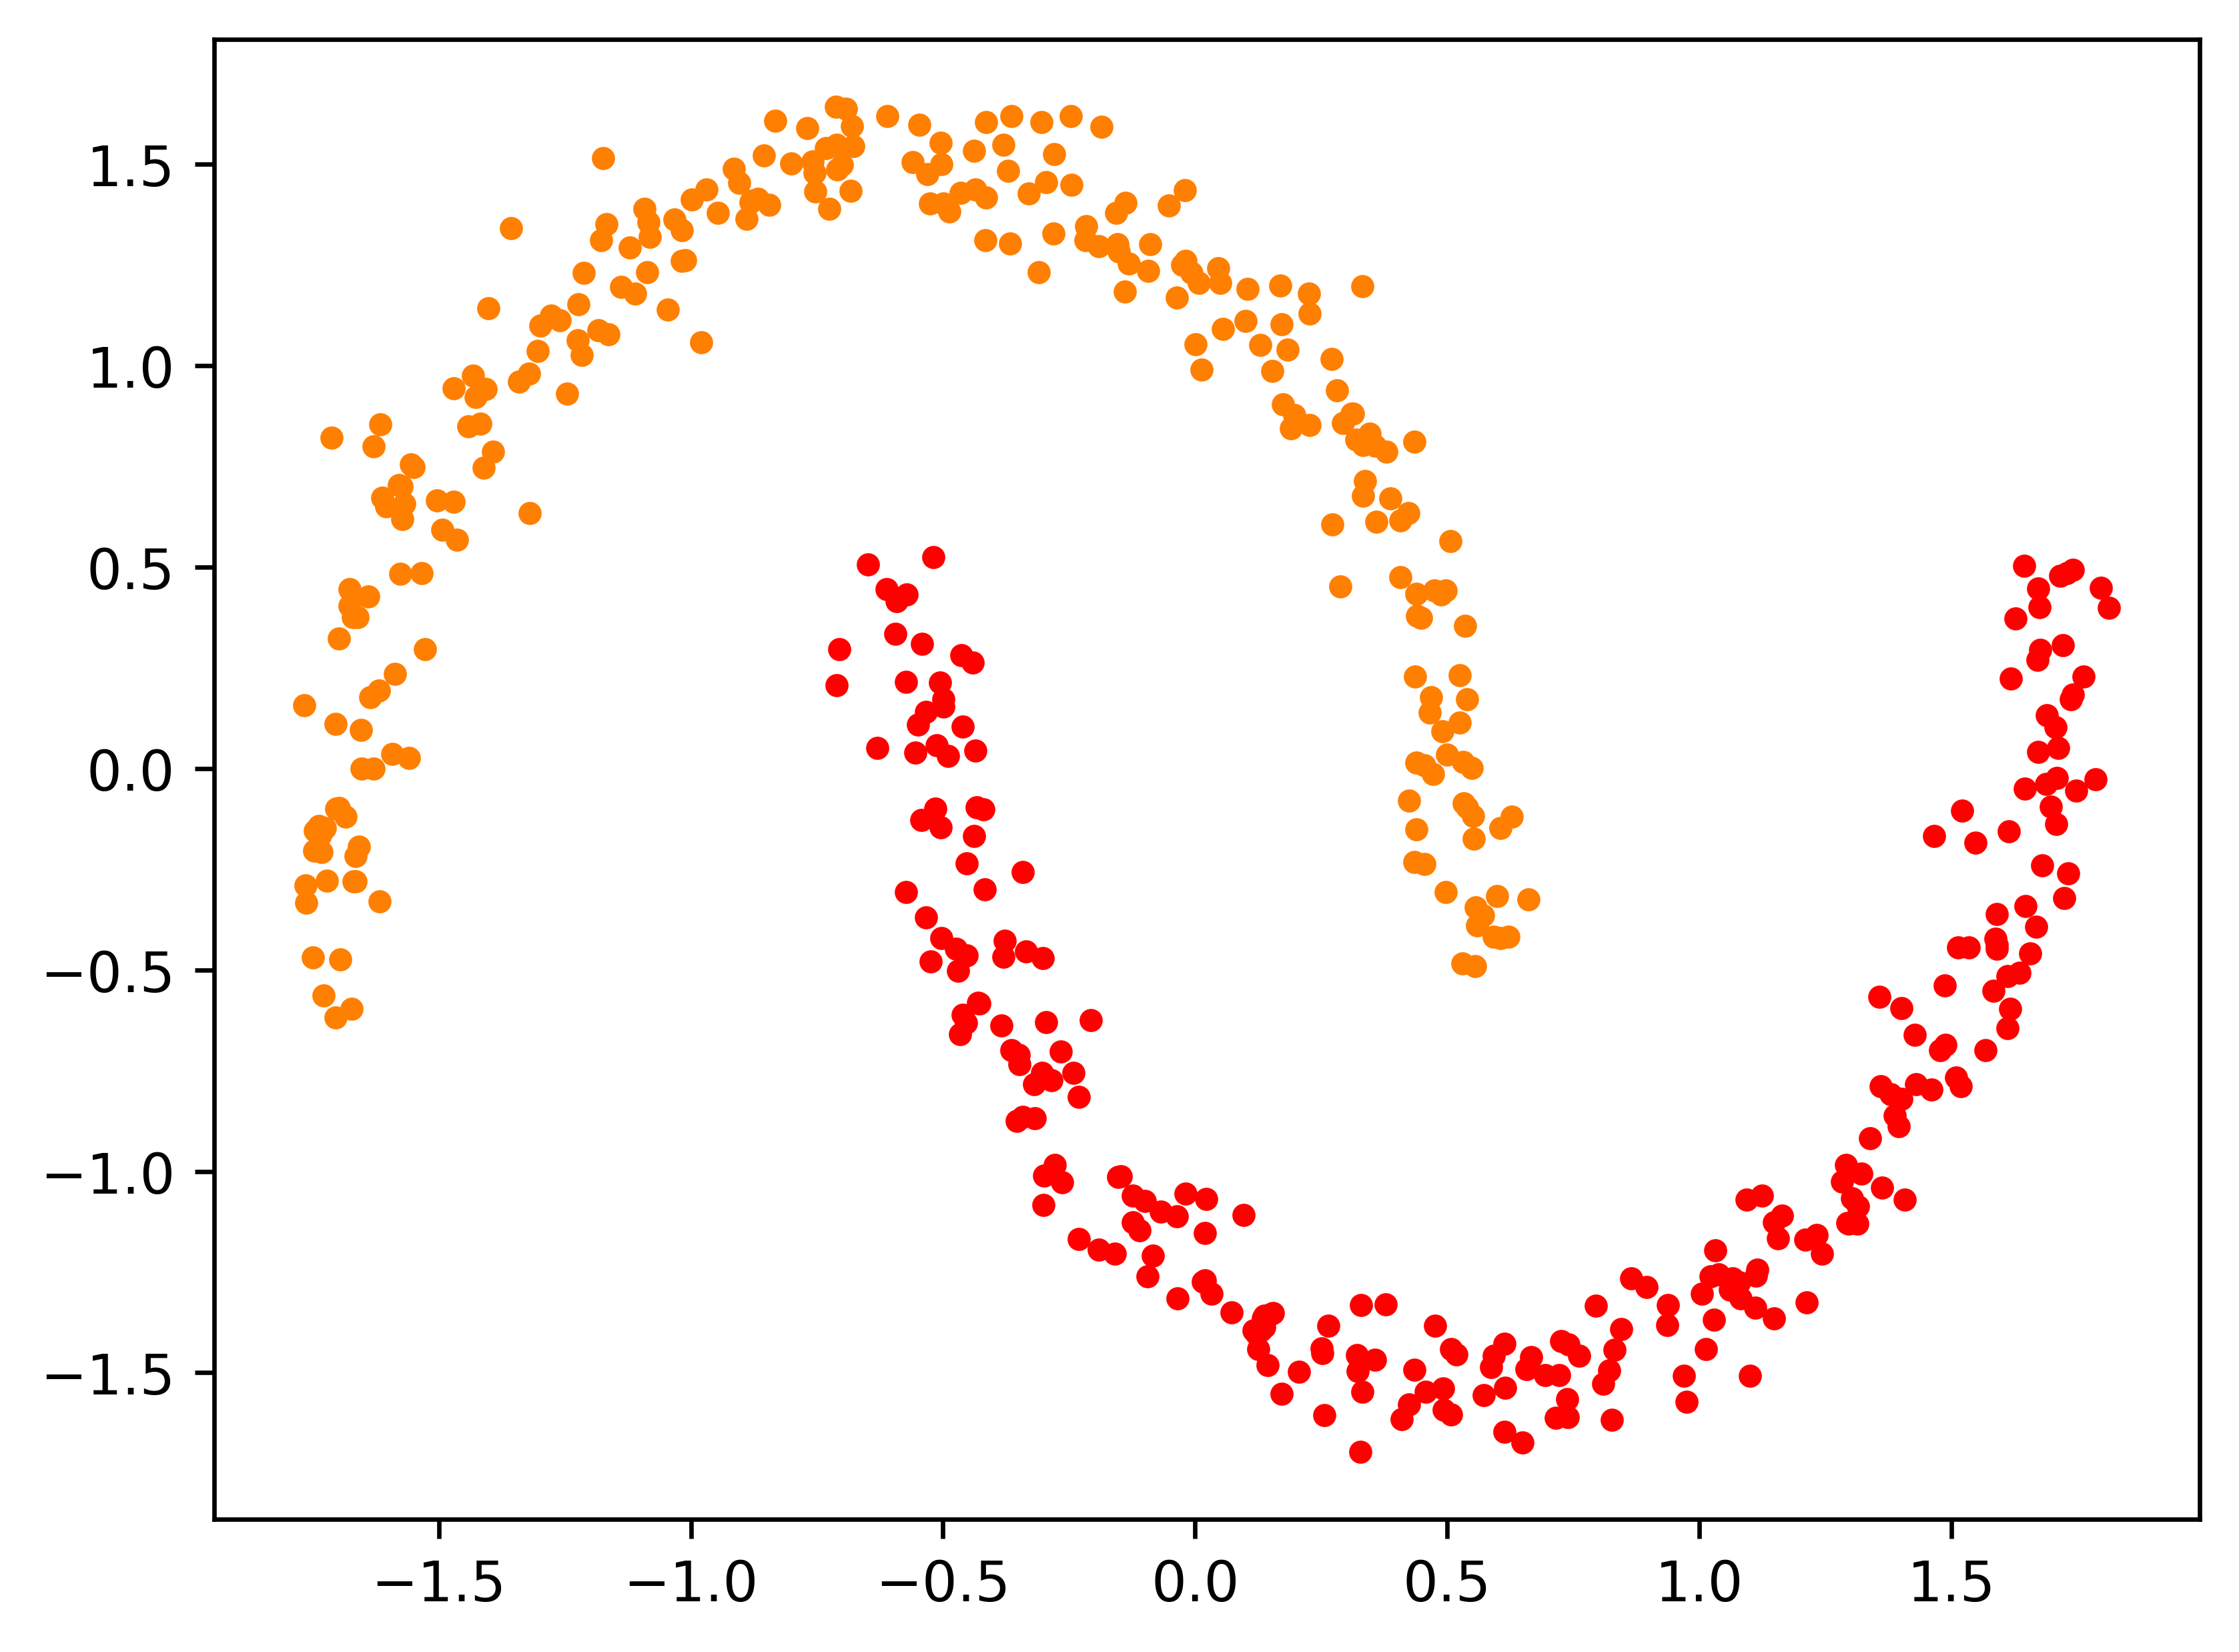

In [7]:
crescents = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
X,y = crescents

spectral_clustering(2, X);

## Now let's get serious! Why don't we cluster some data from the Materials Project?

In [ ]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import pandas as pd

lattice_params_list = []
space_groups = {}

with MPRester("<your-api-key>") as mpr:
    materials_search = mpr.summary.search(elements=["Ag", "S"])  # Example search criteria

    lattice_types = {}
    point_groups = {}

    for i, material in enumerate(materials_search):
        if i < 1000:
            structure = material.structure
            anal_with_crystals = SpacegroupAnalyzer(structure)
            lattice = anal_with_crystals.get_lattice_type()
            space_group = anal_with_crystals.get_space_group_number()
            point_group = anal_with_crystals.get_point_group_symbol()

            bravais = SpacegroupAnalyzer(structure).get_symmetry_dataset()
            
            lattice = structure.lattice
            space_groups[material.material_id] = (bravais["international"], bravais["pointgroup"])

            if len(lattice_types) == 0:
                lattice_types[lattice] = 0
            else:
                if lattice not in lattice_types.keys():
                    i = max(lattice_types.values()) + 1
                    lattice_types[lattice] = i
            
            if len(point_groups) == 0:
                point_groups[point_group] = 0
            else:
                if point_group not in point_groups.keys():
                    i = max(point_groups.values()) + 1
                    point_groups[point_group] = i

            lattice_params_list.append({
                'material_id': material.material_id,
                'lattice_type': lattice_types[lattice],
                'point_group': point_groups[point_group],
                'space_group': space_group,
                'a': lattice.a,
                'b': lattice.b,
                'c': lattice.c,
                'alpha': lattice.alpha,
                'beta': lattice.beta,
                'gamma': lattice.gamma
                })

lattice_params = pd.DataFrame(lattice_params_list)
lattice_params.set_index('material_id', inplace=True)
# print(lattice_params)

/var/folders/29/qjgy5zc10cq2bhs3b_h68ggr0000gn/T/ipykernel_17195/4111973094.py:9: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  materials_search = mpr.summary.search(elements=["Ag", "S"])  # Example search criteria


Retrieving SummaryDoc documents:   0%|          | 0/670 [00:00<?, ?it/s]

## Clustering the data

principle components: 4


(array([[-1.72379095, -0.63525068,  0.5302095 , -1.20742953],
        [-1.71711419, -0.60374127, -0.84490497, -0.63393898],
        [-1.71067695,  0.48656471, -1.40801921,  0.12813279],
        ...,
        [ 1.72035221, -0.84828824, -0.08835841, -0.14150309],
        [ 1.72553331, -0.84824663, -0.09107541, -0.13738528],
        [ 1.73039316, -0.85079046,  0.56460155,  1.10300116]]),
 array([1, 1, 6, 1, 6, 1, 6, 5, 1, 1, 1, 1, 2, 1, 5, 1, 1, 5, 4, 1, 1, 6,
        1, 1, 1, 1, 1, 6, 1, 1, 7, 6, 7, 1, 1, 1, 1, 1, 1, 6, 1, 3, 1, 1,
        1, 1, 7, 1, 1, 3, 2, 6, 1, 1, 1, 6, 1, 2, 3, 1, 6, 1, 2, 1, 1, 1,
        1, 2, 6, 6, 1, 6, 1, 1, 1, 1, 1, 0, 3, 5, 1, 1, 2, 6, 5, 1, 6, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 6, 6, 1, 1, 1, 6, 1, 4, 1, 4, 1,
        6, 1, 2, 1, 2, 1, 4, 1, 4, 1, 1, 6, 2, 7, 3, 1, 1, 1, 5, 6, 7, 1,
        1, 1, 1, 4, 1, 7, 4, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1,
        1, 2, 1, 2, 2, 2, 1, 2, 1, 4, 1, 1, 1, 6, 1, 1, 2, 1, 2, 1, 1, 1,
        2, 1, 1, 2, 6

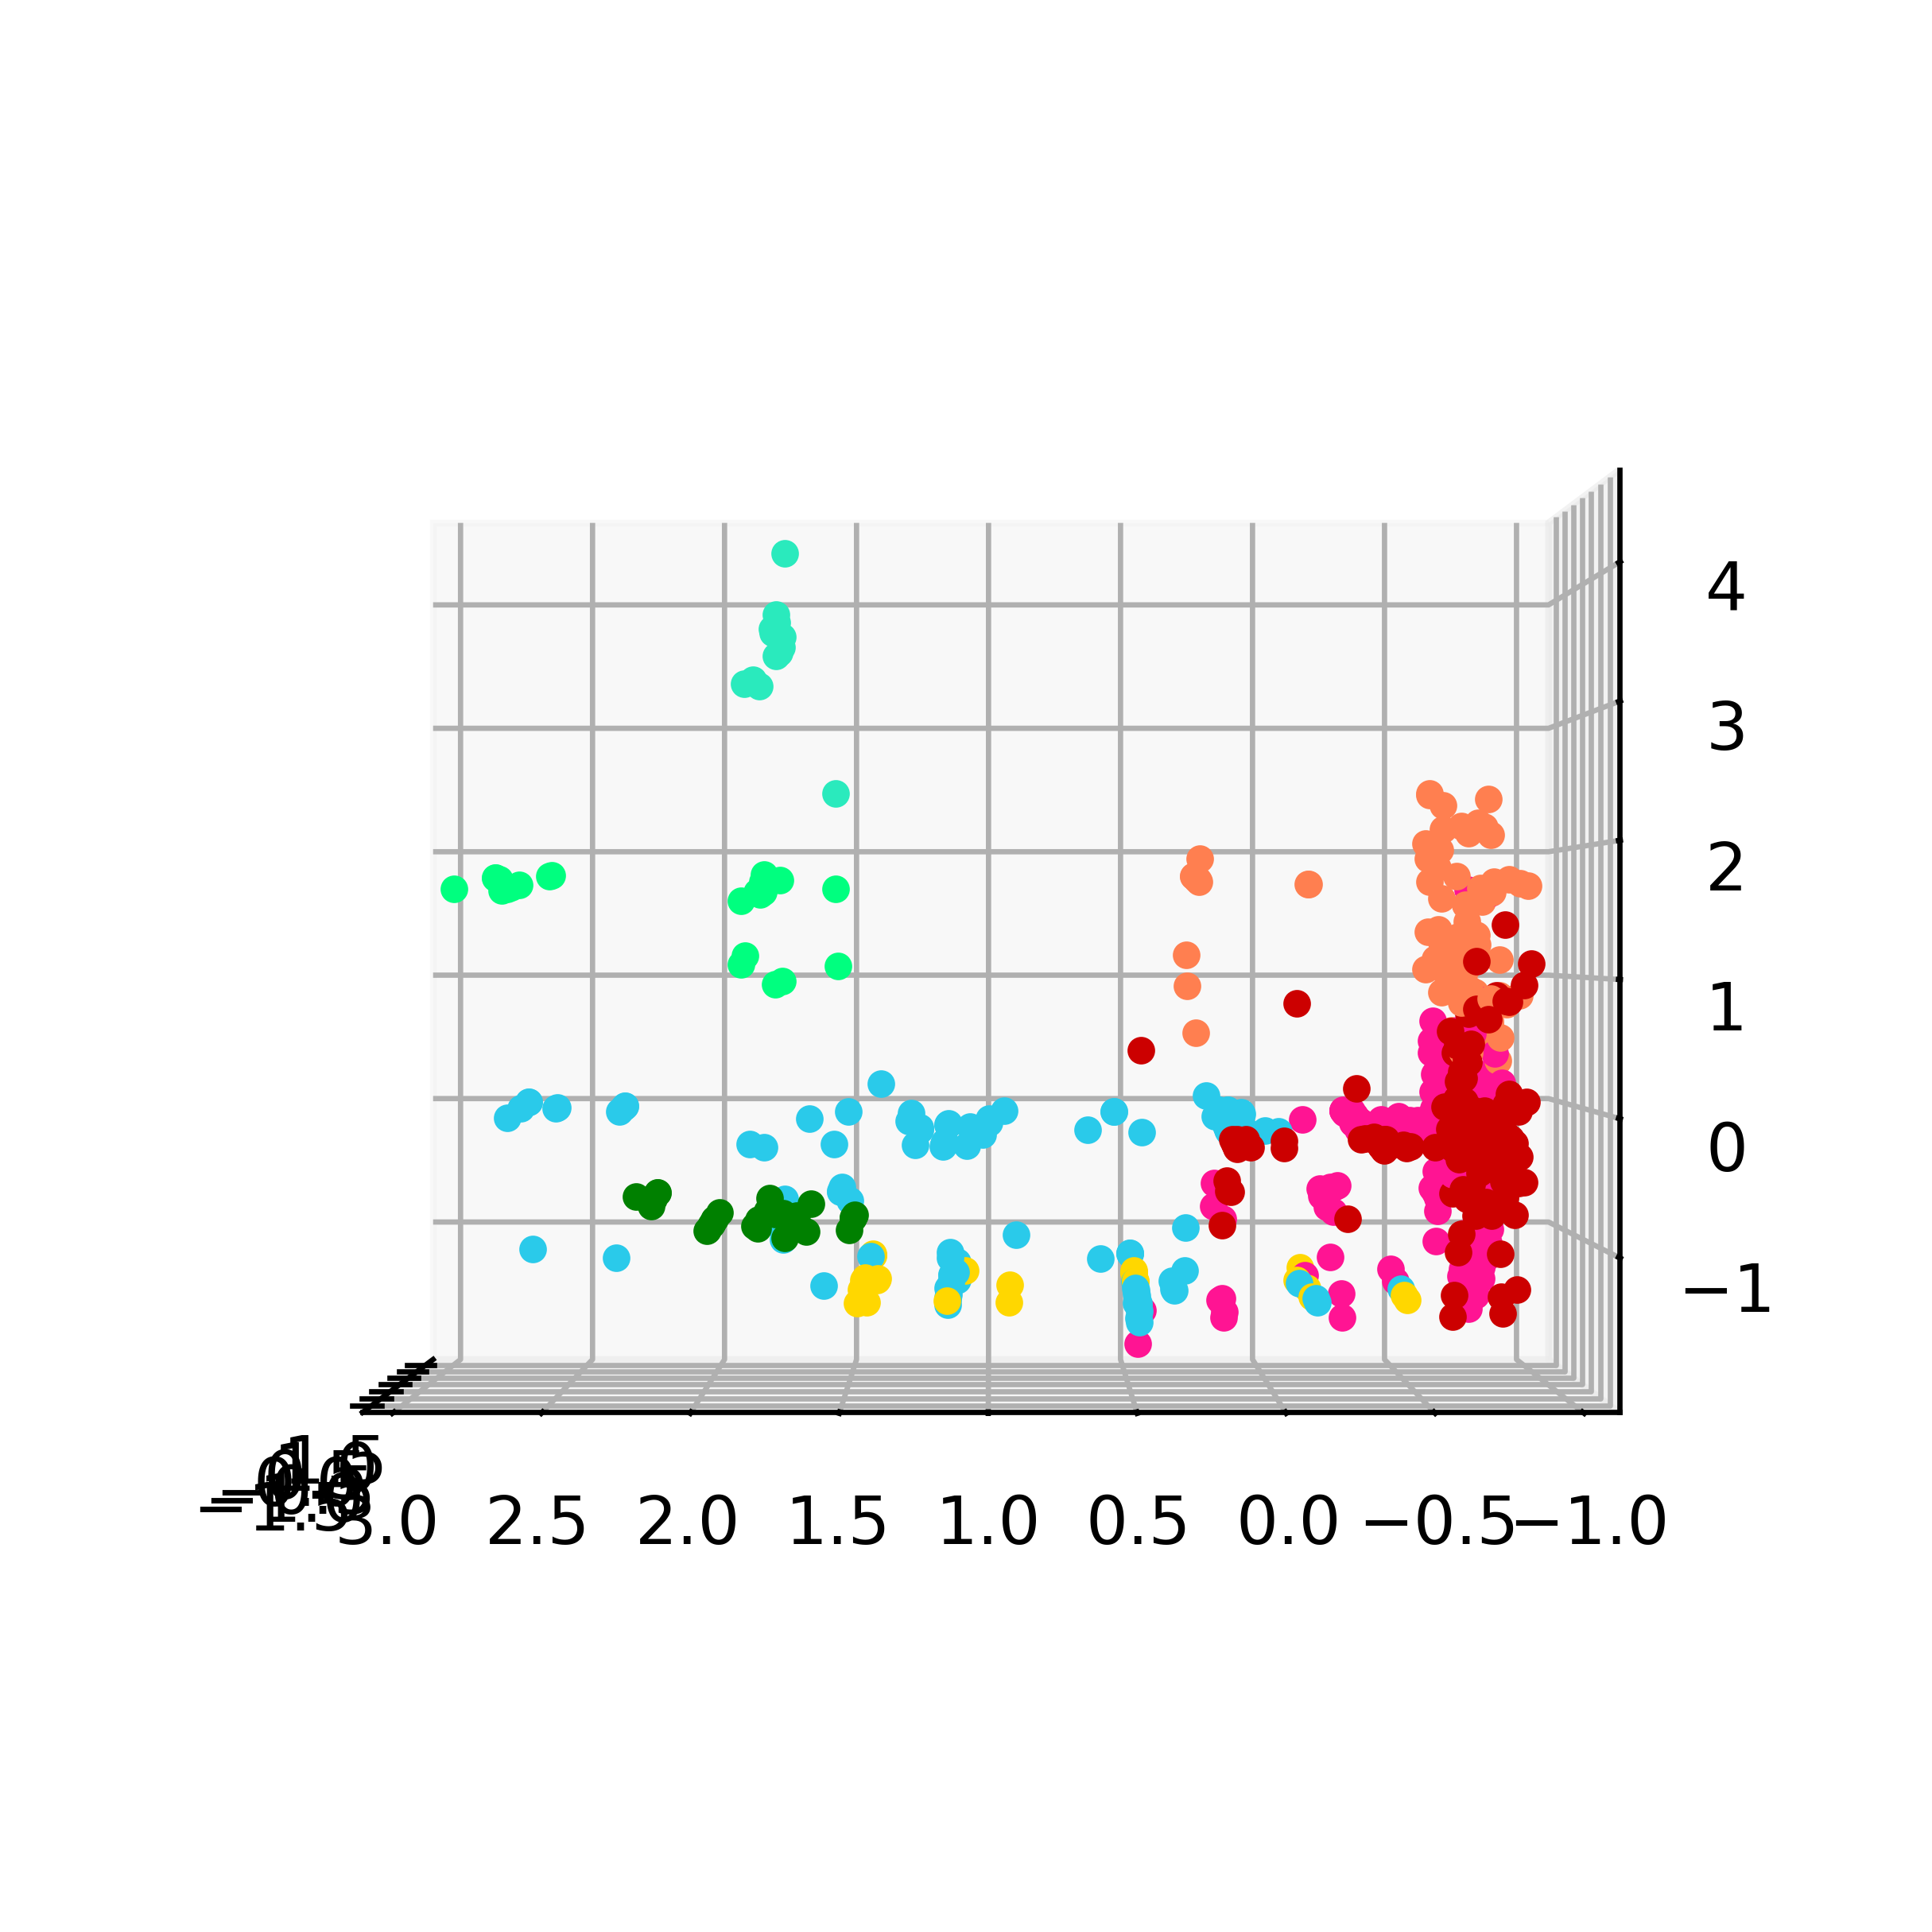

In [29]:
data = lattice_params.values;

n_comp = len(data[0])-1
pc_anal = PCA(n_components = n_comp);
pc_anal.fit_transform(data);

num_components = 0
for i, cum in zip(range(1, n_comp+1), np.cumsum(pc_anal.explained_variance_ratio_ * 100)):
    if cum >= 99:
        num_components = i
        print("principle components: {}".format(num_components))
        break

if num_components < 2:
    pca = PCA(n_components=2);
else:
    # pca = PCA(n_components=num_components);
    pca = PCA(n_components=4);
data_pca = pca.fit_transform(data);

spectral_clustering(8, data_pca, is_3d=True)